## Count data and Poisson distribution

Count the number of occurrences in a specified unit of time, distance, area or volume

A Poisson Process is a model for a series of discrete events where the average time between events is known, but the exact timing of events is random. The arrival of an event is independent of the event before (waiting time between events is memoryless)

The discrete nature of the Poisson distribution is also why this is a probability mass function and not a density function

Poisson random variable - the probability that an event occurs in a given unit of time does not change through time

Poisson distribution

$$ P(y) = \frac{\lambda^y e^{-\lambda}}{y!} $$

$\lambda$ describes both the mean and the variance

Events (*y*) are always positive (ie a lower bound of zero, but have no upper bound) and are discrete (not continuous)

*From Kevin Systrom;*

Any time you need to model 'arrivals' over some time period of time, statisticians like to use the [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Given an average arrival rate of $\lambda$ new cases per day, the probability of seeing $k$ new cases is distributed according to the Poisson distribution:

$$P(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

As we increase lambda the distribution spreads and becomes more symmetric



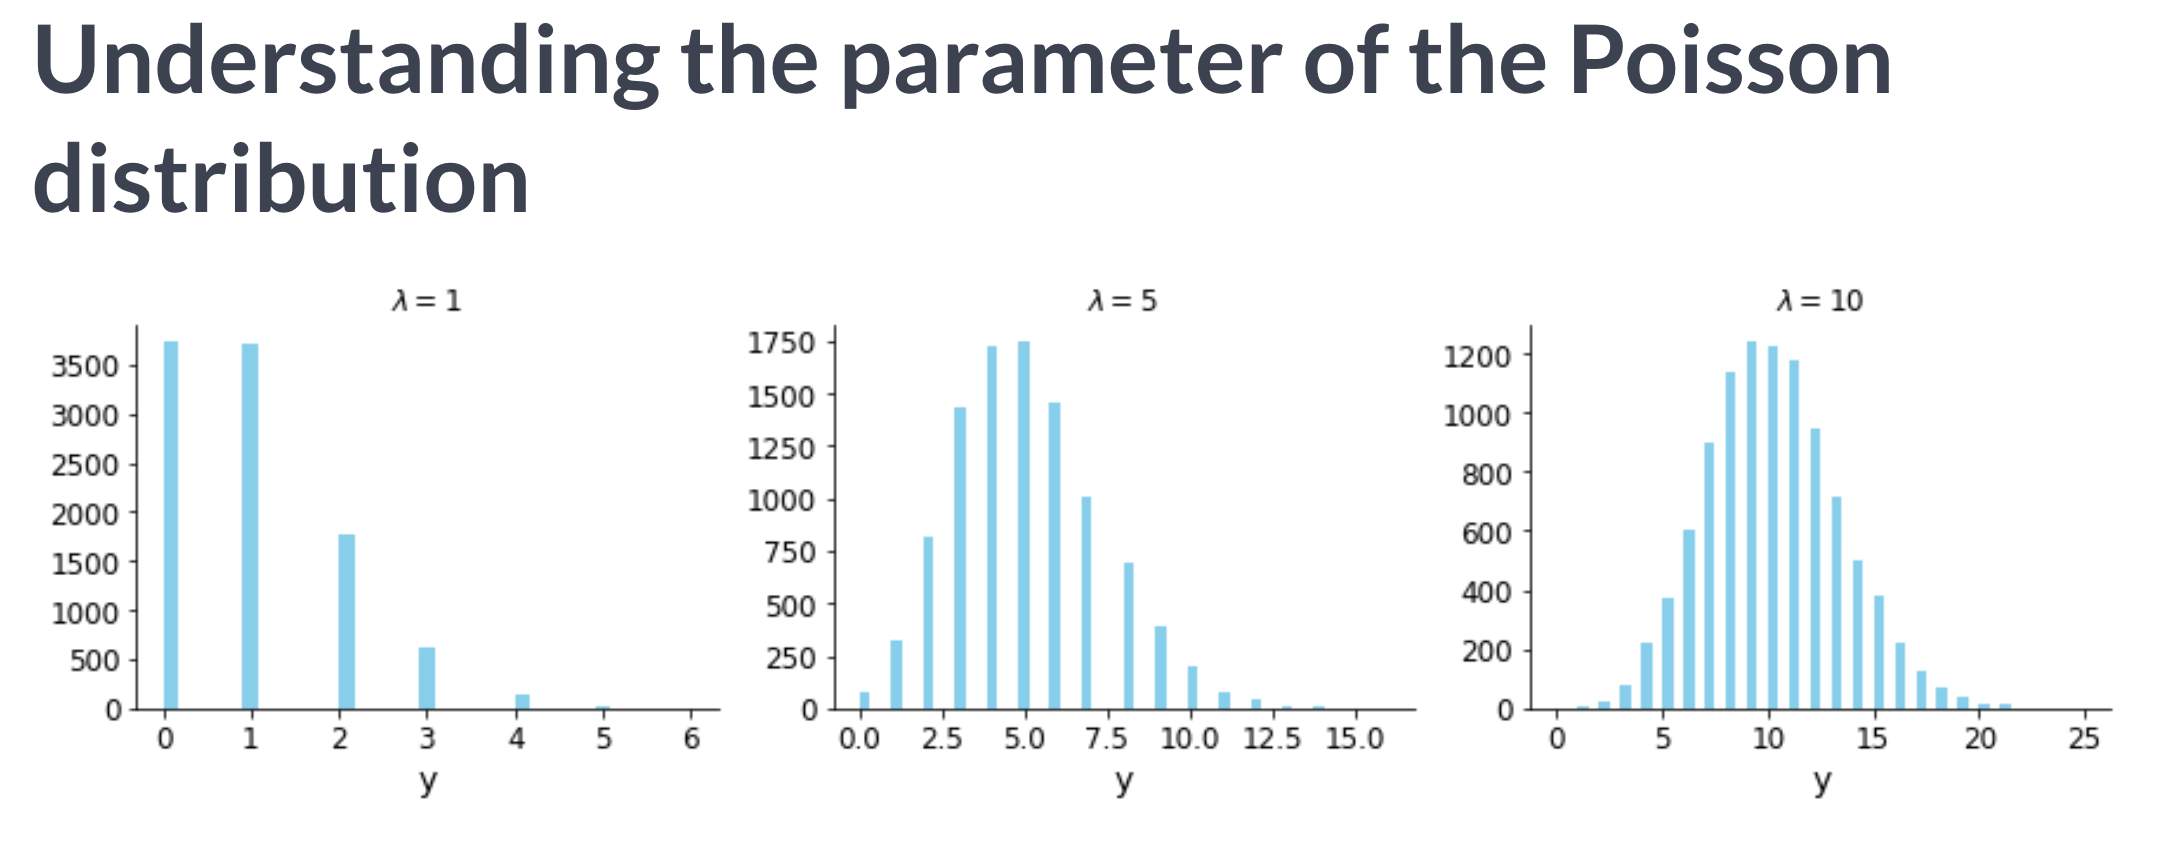

In [3]:
from IPython.display import Image
print('As we increase lambda the distribution spreads and becomes more symmetric\n')
Image('poissondistribution.png', width=600, height=800)

**Poisson regression**

Response variable - y is count, we assume there are Poisson random variables <br>*the tilde means distributed as*

$ y \sim Poisson(\lambda)$

Lambda is the expected value of y

Mean of response

$ E(y) = \lambda$

y has a constraint that it can only be positive, where lambda will also be positive

To remove this constraint we take the logarithm, where the log of lambda then takes values from minus infintity to infinity

**Poisson regression model**

$ log(\lambda) = \beta_0 + \beta_1 x_1$

*x* can be a combination of continuous and categorical variables

if all variables are categorical, then the model is referred to as the "log-linear model"

```
import statsmodels.api as sm
from statsmodels.formula.api import glm

glm('y ~ x',
   data = my_data,
   family = sm.families.Poisson())
```   

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
crab = pd.read_csv('crab.csv')

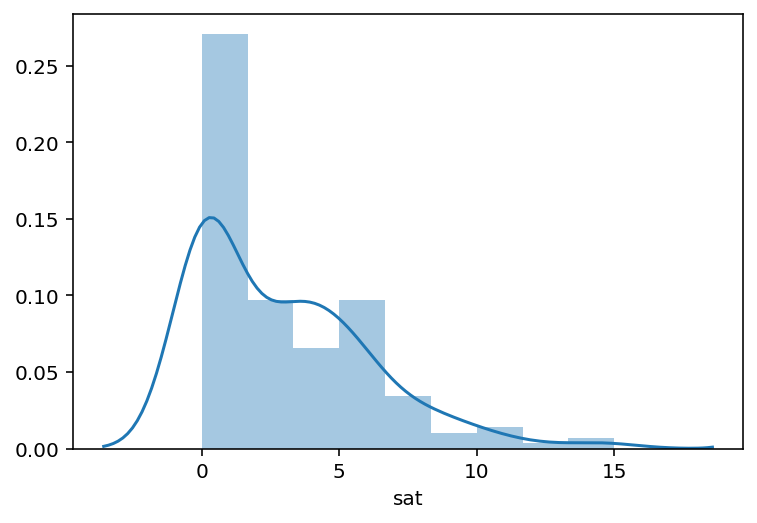

In [10]:
sns.distplot(crab['sat'])

plt.show()

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy as np

# Fit Poisson regression of sat by weight
model = glm('sat ~ weight', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

expBeta1 = round(np.exp(model.params['weight']),3)

print('\nSince the weight of the crab cannot be zero, we will not interpret the effect of the constant term - the intercept')

print(f'''
      \nThe coefficient of the weight is greater than 0, 
Therefore exp(Beta_1) > 1
exp(Beta_1) = {expBeta1}
This means for a 1 unit increase in wieghts, the mean response of y will mulitply by 1.803
Or, an 80% increase in the estimated mean number of satellite crabs
''')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Sat, 18 Apr 2020   Deviance:                       560.87
Time:                        10:37:30   Pearson chi2:                     536.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

**Interpreting model fit**

As in logistic regression, Maximum likelihood estimation (MLE) is used to obtain the values of betas, the parameters which maximise the log-likelihood function


As all parameters are on the log scale we need to exponentiate to obtain the response function in term of lambda

- Poisson regression model

$$ log(\lambda) = \beta_0 + beta_1 x_1 $$

- The response function

$$ \lambda = exp(\beta_0 + \beta_1 x_1) $$

or 

$$ \lambda = exp(\beta_0) * exp(\beta_1 x_1) $$

$ exp(\beta_0)$ = the effect on the mean [$\lambda$] when the explanatory variable ($x$) is zero 
<br> it is not always possible to have x=0

$ \beta_1$ = the expected difference in $y$ on a logarithmic scale for a 1 unit increase in $x$
<br> $ exp(\beta_1)$ = the expected multiplicative effect on the mean of lambda for a 1 unit increase in $x$

**Interpreting the coefficient effect**

If $\beta_1 > 0$
- $exp(\beta_1) > 1$
- $\lambda$ is $exp(\beta_1)$ times larger than when x = 0

If $\beta_1 < 0$
- $exp(\beta_1) < 1$
- $\lambda$ is $exp(\beta_1)$ times smaller than when x = 0

If $\beta_1 = 0$
- $exp(\beta_1) = 1$ the multiplicative factor is 1
- $\lambda = exp(\beta_0)$
- x and y are not related

In [33]:
model = glm('sat ~ width', data = crab, family = sm.families.Poisson()).fit()

# Compute average crab width
mean_width = np.mean(crab['width'])

# Print the compute mean
print('Average width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda, 3))

Average width:  26.299
Estimated mean of y at average width:  2.744


**The probelms of overdispersion**

So far we have assumed that $\lambda =$ both the mean and the variance

$ variance > mean -> overdispersion$

$ variance < mean -> underdispersion$
<br> *this is rare in real world data*

What if this assumption does not hold?

Overdispersion usually results in incorrectly small standard errors and p-values
<br>*ie we become too confident in the results of the parameters*

The Pearson statsitic (chi2) and degrees of freedom (Df Residuals) can  help to estimate the presence of overdispersion

`ratio = model.pearson_chi2 / model.df_resid`

There is no fixed threshold, but we can use approximations:
- $Ratio = 1 -> approximately Poisson$
- $Ratio < 1 -> underdispersion$
- $Ratio > 1 -> overdispersion$

To account for overdispersion we can fit a negative Binomial regression model

The negative Binomial is a generalisation of the Poisson distribution

$E(y) = \lambda$

$Var(y) = \lambda + \alpha \lambda^2$

Alpha $\alpha$ is the dispersion parameter, specifying the level that the distribution's variance exceeds its mean

```
model = glm(`y ~ x`, data = my_data,
            family = sm.families.NegativeBinomial(alpha = 1)).fit()
```            

In [34]:
# Compute and print sample mean of the number of satellites: sat_mean
sat_mean = np.mean(crab.sat)

print('Sample mean:', round(sat_mean, 3))

# Compute and print sample variance of the number of satellites: sat_var
sat_var = np.var(crab.sat)
print('Sample variance:', round(sat_var, 3))

# Compute ratio of variance to mean
print('Ratio:', round(sat_var/sat_mean, 3))

Sample mean: 2.919
Sample variance: 9.855
Ratio: 3.376


**Calculating the expected number of counts**

calculating the expected number of counts per certain value of counts

ie what count of zero satellites should we expect in the sample given the computed sample mean

recall;

$$ P(y) = \frac{\lambda^y e^{-\lambda}}{y!} $$

In [42]:
import math

print('For y = 0')

# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of', round(sat_mean,3), 
      'is',round(exp_zero_cnt,3)*100,'%')

# Number of zero counts in sat variable
actual_zero_ant = sum(crab['sat']  == 0)

# Number of observations in crab dataset
num_obs = len(crab)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_ant / num_obs,3)*100,'%')

For y = 0
Expected zero counts given mean of 2.919 is 5.4 %
Actual zero counts in the sample:  35.8 %


In [46]:
print(f'Ratio for Pearon and degree of freedom {model.pearson_chi2 / model.df_resid}')

print('\nGreater than 1, therefore should not be intrepeted directly')

Ratio for Pearon and degree of freedom 3.1822047438773575

Greater than 1, therefore should not be intrepeted directly


In [53]:
crab_NB = glm(formula = 'sat ~ width', data = crab, 
                  family = sm.families.NegativeBinomial()).fit()

print(crab_NB.summary())

print('\nMost important to note is that the standard error has increased from 0.020 to 0.042')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.80
Date:                Sat, 18 Apr 2020   Deviance:                       206.41
Time:                        11:43:35   Pearson chi2:                     155.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0323      1.129     -3.572      0.0

In [57]:
# Compute confidence intervals for crab_Pois model
print('Confidence intervals for the Poisson model')
print(model.conf_int())

# Compute confidence intervals for crab_NB model
print('\nConfidence intervals for the Negative Binomial model')
print(crab_NB.conf_int())

print('\nThe confidence intervals are wider for the negative Binomial model')

Confidence intervals for the Poisson model
                  0         1
Intercept -4.367531 -2.241983
width      0.124914  0.203176

Confidence intervals for the Negative Binomial model
                  0         1
Intercept -6.244509 -1.820000
width      0.108155  0.274472

The confidence intervals are wider for the negative Binomial model


**Visualising**

A rule of thumb is that a normal distribution is a good approximation to a Poisson distribution for data with the mean above ~30

Note, the two regression models provide similar prediction over the range of width values, 
where most of the observations occur
But diverge at the two tail ends of the distribution



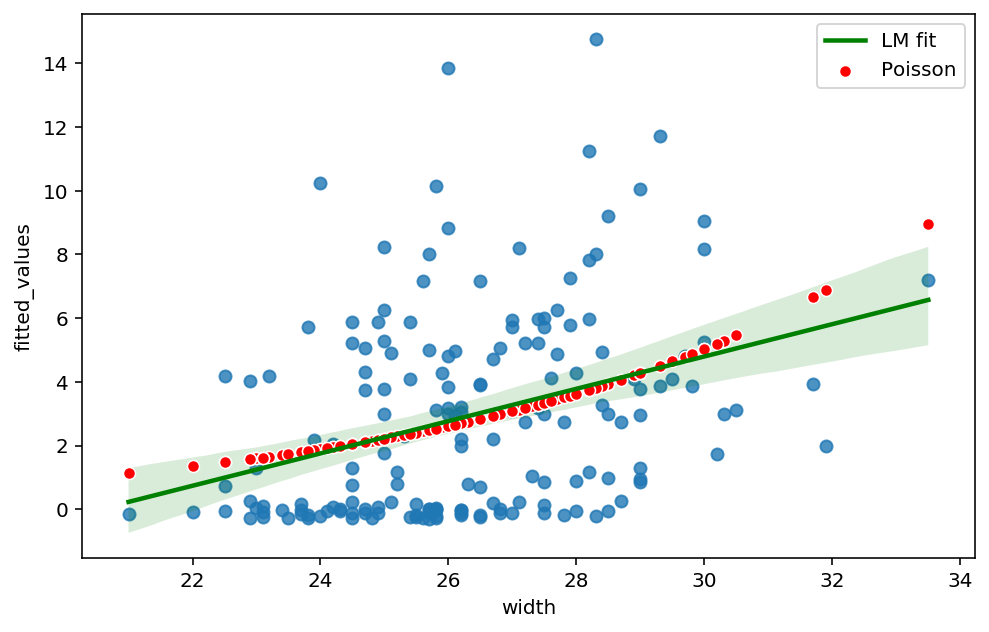

In [67]:
print('''Note, the two regression models provide similar prediction over the range of width values, 
where most of the observations occur
But diverge at the two tail ends of the distribution\n''')

plt.subplots(figsize = (8,5))

# fit_reg = False ensures the linear model is not fitted
sns.regplot('width', 'sat', data=crab, 
            fit_reg=True,
           y_jitter = 0.3,
           line_kws = {'color':'green',
                      'label':'LM fit'})

crab['fitted_values'] = model.fittedvalues

sns.scatterplot('width', 'fitted_values', data=crab,
               color = 'r',
               label = 'Poisson');

In [69]:
new_data = pd.DataFrame({'width':[24, 28, 32]})

model.predict(new_data)

0    1.881981
1    3.627360
2    6.991433
dtype: float64

Given the width of a crab of 24, we predict there will be 1.88 (or 2) satellite crabs.

At 28 we expect 4, and at 32 we expect 7